<a href="https://colab.research.google.com/github/somkiatth/git/blob/master/Copy_of_Ex_DataCleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Hands-On Data Preprocessing in Python
Learn how to effectively prepare data for successful data analytics
    
## Data Cleaning Level Ⅲ – Missing values, outliers, and errors


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/Drives')

Mounted at /content/Drives


## Excercise 1
In this exercise, we will be using **Temperature Data.csv**. This dataset has some missing values. Do the following.

    a. After reading the file into a Pandas DataFrame, check if the dataset is level Ⅰ clean and if not clean it. Also, describe the cleanings if any.




In [2]:
day_df = pd.read_csv('Temperature Data.csv')
day_df

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,RI2,TMP,1/1/2019 0:00,9.0,oC,P
1,RI2,TMP,2/1/2019 0:00,6.0,oC,P
2,RI2,TMP,3/1/2019 0:00,5.0,oC,P
3,RI2,TMP,4/1/2019 0:00,4.0,oC,P
4,RI2,TMP,5/1/2019 0:00,5.0,oC,P
...,...,...,...,...,...,...
360,RI2,TMP,27/12/2019 00:00,8.0,oC,P
361,RI2,TMP,28/12/2019 00:00,9.0,oC,P
362,RI2,TMP,29/12/2019 00:00,8.0,oC,P
363,RI2,TMP,30/12/2019 00:00,7.0,oC,P


In [3]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Site                     365 non-null    object 
 1   Species                  365 non-null    object 
 2   ReadingDateTime          365 non-null    object 
 3   Value                    351 non-null    float64
 4   Units                    365 non-null    object 
 5   Provisional or Ratified  365 non-null    object 
dtypes: float64(1), object(5)
memory usage: 17.2+ KB


In [4]:
day_df.head(1)

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,RI2,TMP,1/1/2019 0:00,9.0,oC,P


In [5]:
keys = ['Q{}'.format(i) for i in range(1,7)]

columns_dic = pd.Series(day_df.columns,index=keys)

In [6]:
day_df.columns = keys

In [7]:
day_df.head(1)

,Q1,Q2,Q3,Q4,Q5,Q6
0,RI2,TMP,1/1/2019 0:00,9.0,oC,P


    b. Check if the dataset is level Ⅱ clean and if not clean it. Also, describe the cleanings if any.

In [8]:
def sep(v):
  return v.Q3[:v.Q3.find(' ')]

day_df['Date'] = day_df.apply(sep,axis=1)
day_df.Date = pd.to_datetime(day_df.Date)

<ipython-input-8-10a1ce038c21>:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  day_df.Date = pd.to_datetime(day_df.Date)


In [9]:
day_df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Date
0,RI2,TMP,1/1/2019 0:00,9.0,oC,P,2019-01-01
1,RI2,TMP,2/1/2019 0:00,6.0,oC,P,2019-02-01
2,RI2,TMP,3/1/2019 0:00,5.0,oC,P,2019-03-01
3,RI2,TMP,4/1/2019 0:00,4.0,oC,P,2019-04-01
4,RI2,TMP,5/1/2019 0:00,5.0,oC,P,2019-05-01


In [10]:
day_df['Date'] = day_df.Q3
day_df['Date'] = pd.to_datetime(day_df.Date, format='%d/%m/%Y %H:%M')

In [11]:
day_df.set_index('Q3', inplace=True)
day_df

,Q1,Q2,Q4,Q5,Q6,Date
Q3,,,,,,
1/1/2019 0:00,RI2,TMP,9.0,oC,P,2019-01-01
2/1/2019 0:00,RI2,TMP,6.0,oC,P,2019-01-02
3/1/2019 0:00,RI2,TMP,5.0,oC,P,2019-01-03
4/1/2019 0:00,RI2,TMP,4.0,oC,P,2019-01-04
5/1/2019 0:00,RI2,TMP,5.0,oC,P,2019-01-05
...,...,...,...,...,...,...
27/12/2019 00:00,RI2,TMP,8.0,oC,P,2019-12-27
28/12/2019 00:00,RI2,TMP,9.0,oC,P,2019-12-28
29/12/2019 00:00,RI2,TMP,8.0,oC,P,2019-12-29


In [12]:
def dmy(r):
  r['Day'] = r.Date.day
  r['Month'] = r.Date.month
  r['Year'] = r.Date.year
  return r
day_df = day_df.apply(dmy,axis=1)

In [13]:
day_df

,Q1,Q2,Q4,Q5,Q6,Date,Day,Month,Year
Q3,,,,,,,,,
1/1/2019 0:00,RI2,TMP,9.0,oC,P,2019-01-01,1,1,2019
2/1/2019 0:00,RI2,TMP,6.0,oC,P,2019-01-02,2,1,2019
3/1/2019 0:00,RI2,TMP,5.0,oC,P,2019-01-03,3,1,2019
4/1/2019 0:00,RI2,TMP,4.0,oC,P,2019-01-04,4,1,2019
5/1/2019 0:00,RI2,TMP,5.0,oC,P,2019-01-05,5,1,2019
...,...,...,...,...,...,...,...,...,...
27/12/2019 00:00,RI2,TMP,8.0,oC,P,2019-12-27,27,12,2019
28/12/2019 00:00,RI2,TMP,9.0,oC,P,2019-12-28,28,12,2019
29/12/2019 00:00,RI2,TMP,8.0,oC,P,2019-12-29,29,12,2019


    c. The dataset has missing values. See how many, and run diagnosis to see what types of missing values they are.

In [14]:
print('Number of missing values:')
for col in day_df.columns:
  nMV = sum(day_df[col].isna())
  print('{}:{}'.format(col,nMV))

Number of missing values:
Q1:0
Q2:0
Q4:14
Q5:0
Q6:0
Date:0
Day:0
Month:0
Year:0


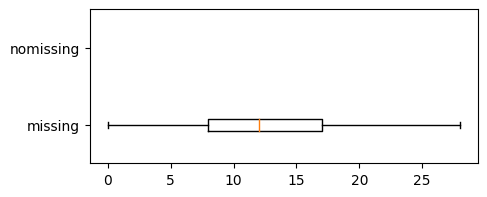

In [18]:
gMV = day_df.Q4.isna()
values = ['missing','nomissing']

box_sr = pd.Series('',index = gMV.unique())

for poss in gMV.unique():
    BM = gMV == poss
    box_sr[poss] = day_df[BM].Q4

plt.figure(figsize=(5,2))
plt.boxplot(box_sr,vert=False)
plt.yticks([1,2],values)
plt.show()

    d. Are there any outliers in the dataset?

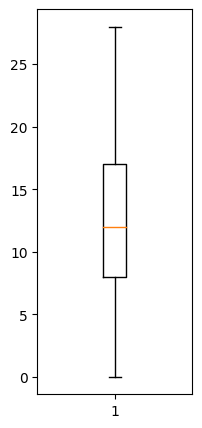

In [20]:
plt.figure(figsize=(2,5))
plt.boxplot(day_df.Q4.dropna())
plt.show()

    e. How should we best deal with the missing values if our goal is to draw multiple boxplots that show the central tendency and variation of temperature across the months? Draw the described visualization after dealing with the missing values.

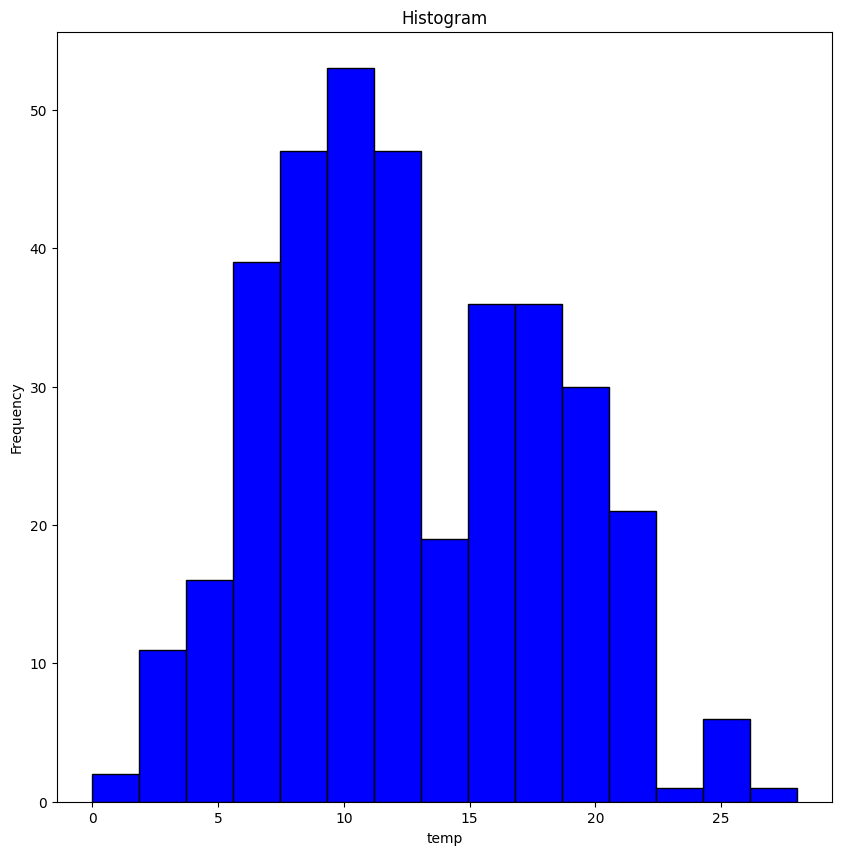

In [23]:
plt.figure(figsize=(10, 10))
plt.hist(day_df['Q4'], bins=15, color='blue', edgecolor='black')
plt.title('Histogram')
plt.xlabel('temp')
plt.ylabel('Frequency')
plt.show()